# Phân tích các yếu tố ảnh hưởng đến kết quả bài thi của học sinh

In [1]:
#Import các thư viện Numpy, Pandas, Seaborn, Matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Đặt điểm tối thiểu để qua kỳ thi là 40
passmark = 40

In [3]:
#Đọc dữ liệu từ file csv
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
#In ra một vài dòng dữ liệu
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [5]:
#Kích thước của dữ liệu (1000 dòng, 8 cột)
print (df.shape)

(1000, 8)


In [6]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [7]:
#Kiểm tra giá trị null trong bảng
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Phân bố của các thuộc tính trong bảng

### Giới tính

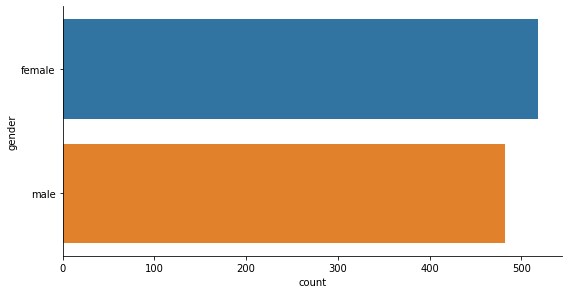

In [8]:
sns.catplot(y="gender",  kind="count", height=4, aspect=2, data=df);

In [9]:
df['gender'].value_counts(normalize=True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

### Sắc tộc

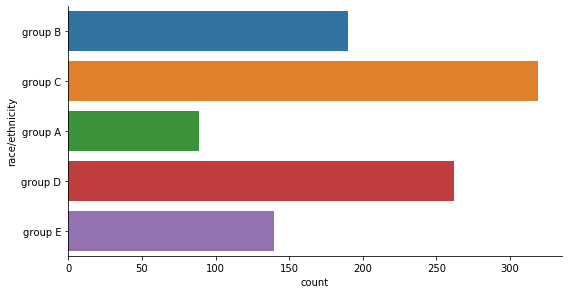

In [10]:
sns.catplot(y="race/ethnicity",  kind="count", height=4, aspect=2, data=df);

In [11]:
df['race/ethnicity'].value_counts(normalize=True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

### Trình độ học vấn của phụ huynh

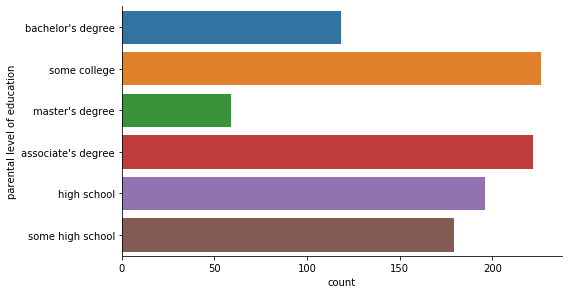

In [12]:
sns.catplot(y="parental level of education",  kind="count", height=4, aspect=2, data=df);

In [13]:
df['parental level of education'].value_counts(normalize=True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

### Ăn trưa

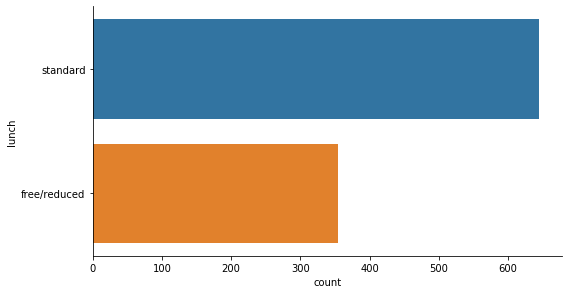

In [14]:
sns.catplot(y="lunch",  kind="count", height=4, aspect=2, data=df);

In [15]:
df['lunch'].value_counts(normalize=True) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

### Chuẩn bị trước kiểm tra

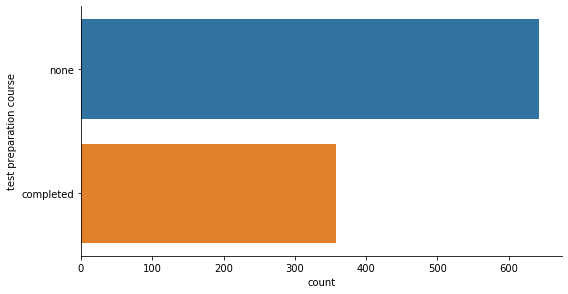

In [16]:
sns.catplot(y="test preparation course",  kind="count", height=4, aspect=2, data=df);

In [17]:
df['test preparation course'].value_counts(normalize=True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

### Ảnh hưởng của các yếu tố đến điểm kiểm tra

#### Math

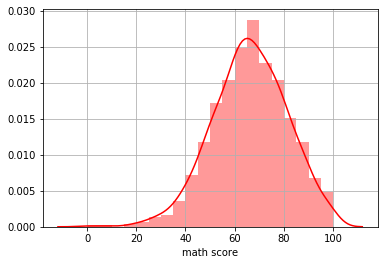

In [18]:
#Phân bố của điểm Math
sns.distplot(df['math score'], bins=20, color='red')
plt.grid()

In [19]:
#Số học sinh qua môn Math
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'Fail', 'Pass')
df.Math_PassStatus.value_counts()

Pass    960
Fail     40
Name: Math_PassStatus, dtype: int64

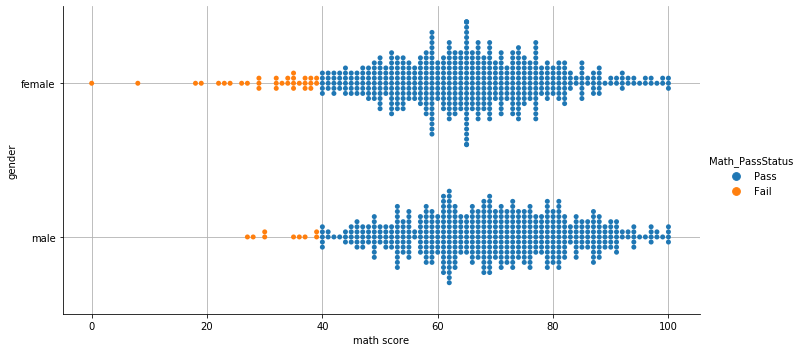

In [20]:
#Ảnh hưởng của giới tính đến kết quả
sns.catplot(y="gender", x="math score", data=df, height=5, aspect=2, kind='swarm', hue='Math_PassStatus');
plt.grid()

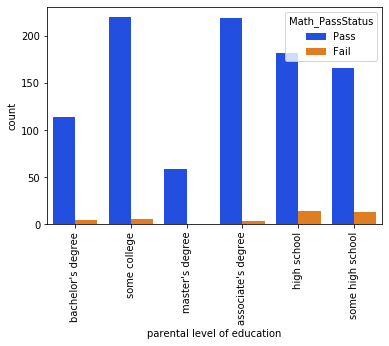

In [21]:
#Ảnh hưởng của trình độ học vấn cha mẹ đến kết quả
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright');
_ = plt.setp(p.get_xticklabels(), rotation=90) 

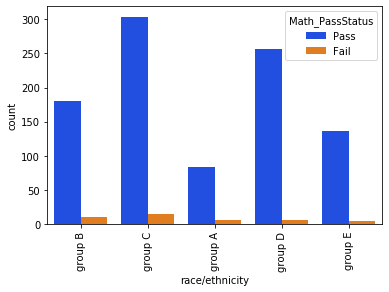

In [22]:
#Ảnh hưởng của sắc tộc đến kết quả
p = sns.countplot(x='race/ethnicity', data = df, hue='Math_PassStatus', palette='bright');
_ = plt.setp(p.get_xticklabels(), rotation=90) 

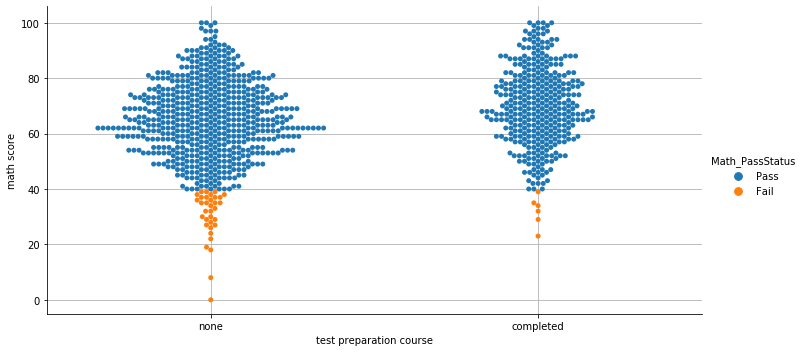

In [23]:
#Ảnh hưởng của việc chuẩn bị trước kỳ thi đến kết quả
sns.catplot(x="test preparation course", y="math score", data=df, height=5, aspect=2, kind='swarm', hue='Math_PassStatus');
plt.grid()

#### Reading

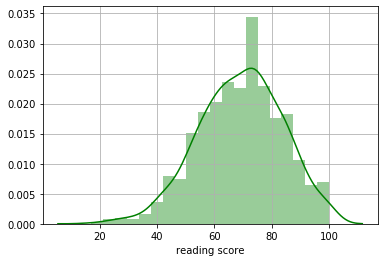

In [24]:
#Phân bố của điểm Reading
sns.distplot(df['reading score'], bins=20, color='green')
plt.grid()

In [25]:
#Số học sinh qua môn Reading
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

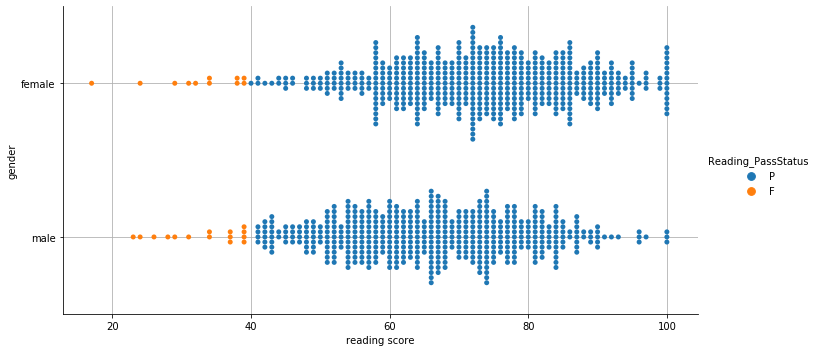

In [26]:
#Ảnh hưởng của giới tính đến kết quả
sns.catplot(y="gender", x="reading score", data=df, height=5, aspect=2, kind='swarm', hue='Reading_PassStatus');
plt.grid()

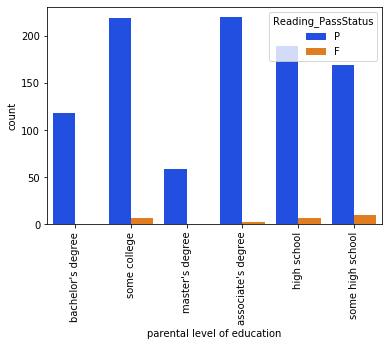

In [27]:
#Ảnh hưởng của trình độ học vấn cha mẹ đến kết quả
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

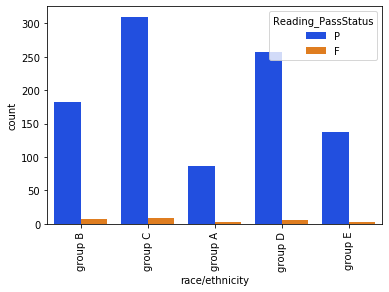

In [28]:
#Ảnh hưởng của sắc tộc đến kết quả
p = sns.countplot(x='race/ethnicity', data = df, hue='Reading_PassStatus', palette='bright');
_ = plt.setp(p.get_xticklabels(), rotation=90) 

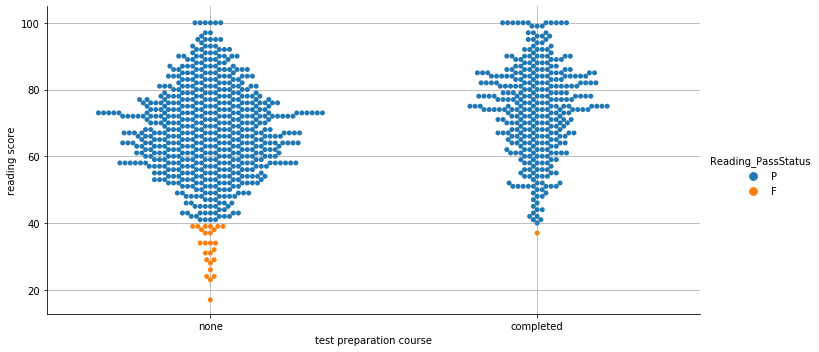

In [29]:
#Ảnh hưởng của việc chuẩn bị trước kỳ thi đến kết quả
sns.catplot(x="test preparation course", y="reading score", data=df, height=5, aspect=2, kind='swarm', hue='Reading_PassStatus');
plt.grid()

#### Writing

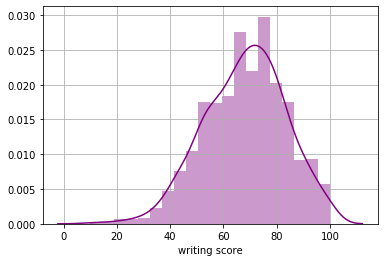

In [30]:
#Phân bố của điểm Writing
sns.distplot(df['writing score'], bins=20, color='purple')
plt.grid()

In [31]:
#Số học sinh qua Writing
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

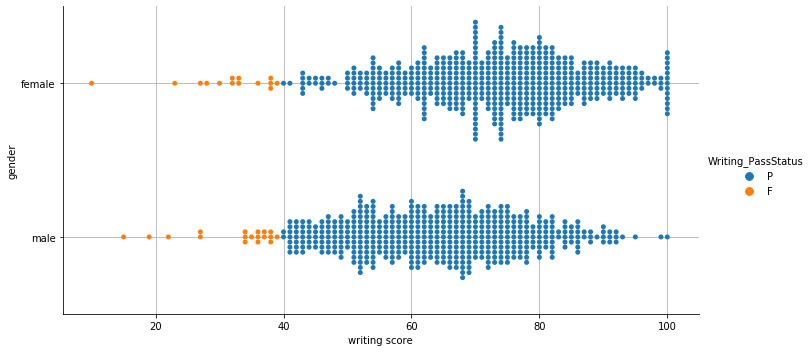

In [32]:
#Ảnh hưởng của giới tính đến kết quả
sns.catplot(y="gender", x="writing score", data=df, height=5, aspect=2, kind='swarm', hue='Writing_PassStatus');
plt.grid()

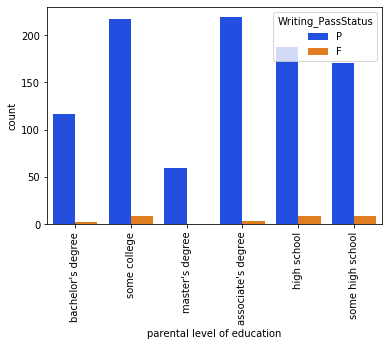

In [33]:
#Ảnh hưởng của trình độ học vấn cha mẹ đến kết quả
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

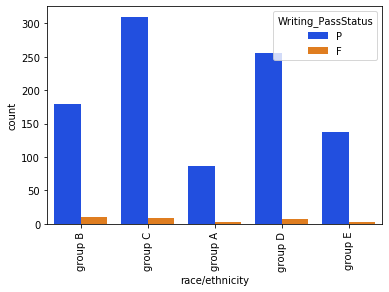

In [34]:
#Ảnh hưởng của sắc tộc đến kết quả
p = sns.countplot(x='race/ethnicity', data = df, hue='Writing_PassStatus', palette='bright');
_ = plt.setp(p.get_xticklabels(), rotation=90) 

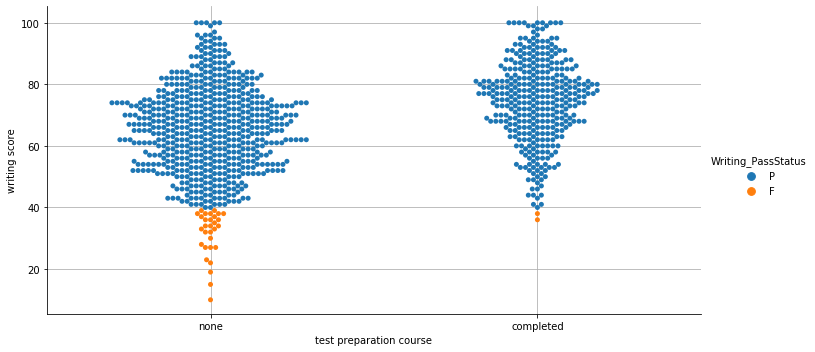

In [35]:
#Ảnh hưởng của việc chuẩn bị trước kỳ thi đến kết quả
sns.catplot(x="test preparation course", y="writing score", data=df, height=5, aspect=2, kind='swarm', hue='Writing_PassStatus');
plt.grid()